In [1]:
# Author - Akash K S
# Roll No - CS22MTECH11012

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
# Creating the training data
def create_data():
  D1 = torch.normal(0.0, 1.0, size = [500, 2])
  D2 = torch.normal(4.0, 1.0, size = [500, 2])

  # Creating empty tensor with extra dim which is to add x0 = 1
  X = torch.empty(1000, D1.size(1)+1).fill_(1)
  X[::2, :2] = D1
  X[1::2, :2] = D2

  Y = torch.empty(1000, 1)
  Y[::2, :2] = 1
  Y[1::2, :2] = -1

  return X, Y, D1, D2

In [4]:
# Defining the hinge loss function
def hinge_loss(y_pred, Y, w):
  loss = torch.clamp(1 - Y * y_pred, min = 0).mean()
  return loss + 0.5 * torch.sum(torch.square(w)) # Adding the regularization parameter

In [5]:
# Dedining the gradient
def compute_gradient(X, Y, y_pred):
  grad_W = -(Y * X).t()/X.size(0)
  grad_W = grad_W @ (Y * y_pred < 1).float()
  return grad_W

In [6]:
def plot_before_training(W, D1, D2):
  x = np.linspace(-5,5,500)
  y = np.zeros(500,) 
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(D1[:,0], D1[:,1])
  plt.scatter(D2[:,0], D2[:,1])
  plt.grid()
  plt.show()

In [7]:
# Plot the linear classification
def plot_after_training(W, D1, D2):
    x = np.linspace(-5, 5, 500)
    y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
    plt.plot(x, y, 'r', label = 'W')
    plt.title('Graph of W after training')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.scatter(D1[:,0], D1[:,1])
    plt.scatter(D2[:,0], D2[:,1])
    plt.grid()
    plt.show()

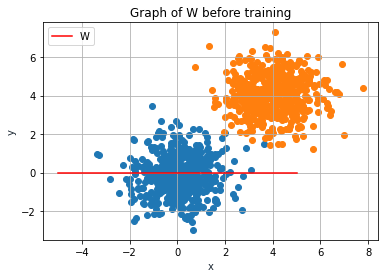

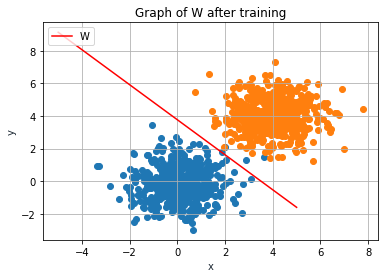

In [8]:
X, Y, D1, D2 = create_data()

# Initiating the w parameter
w = torch.rand(3,1)

plot_before_training(w, D1, D2)

learning_rate = 0.01
no_iterations = 1000

for i in range(no_iterations):
  #finding the dot product W.X
  y_pred = torch.mm(X,w)

  # Calculating the loss
  loss = hinge_loss(y_pred, Y, w)

  # Computing gradient
  grad_w = compute_gradient(X, Y, y_pred)

  # Gradient Descent update
  w = w - learning_rate * grad_w
  
plot_after_training(w, D1, D2)
  
